In [23]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Import data
dataDF = pd.read_csv('data_stocks.csv')

In [25]:
dataDF.shape

(41266, 502)

In [26]:
# Drop date variable
dataDF = dataDF.drop(['DATE'], 1)

In [27]:
dataDF.shape

(41266, 501)

In [28]:
# Dimensions of dataset
n = dataDF.shape[0]
p = dataDF.shape[1]

In [29]:
print(n)
print(p)

41266
501


In [30]:
# Make data a numpy array
data = dataDF.values

In [31]:
data

array([[2363.6101,   42.33  ,  143.68  , ...,   63.86  ,  122.    ,
          53.35  ],
       [2364.1001,   42.36  ,  143.7   , ...,   63.74  ,  121.77  ,
          53.35  ],
       [2362.6799,   42.31  ,  143.6901, ...,   63.75  ,  121.7   ,
          53.365 ],
       ...,
       [2470.03  ,   44.74  ,  164.01  , ...,   76.88  ,  114.31  ,
          62.685 ],
       [2471.49  ,   44.71  ,  163.88  , ...,   76.83  ,  114.23  ,
          62.6301],
       [2471.49  ,   44.74  ,  163.98  , ...,   76.81  ,  114.28  ,
          62.68  ]])

In [32]:
data.shape

(41266, 501)

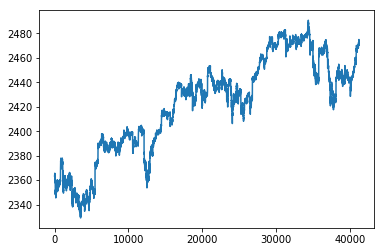

In [34]:
plt.plot(dataDF['SP500'])

In [35]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

In [36]:
print(data_train.shape)

(33012, 501)


In [37]:
print(data_test.shape)

(8254, 501)


In [38]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

In [39]:
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

In [40]:
X_train

array([[0.10993038, 0.18116315, 0.06281066, ..., 0.05135952, 0.37568157,
        0.09098787],
       [0.11212898, 0.18219249, 0.09399006, ..., 0.04229607, 0.36314068,
        0.09098787],
       [0.10846464, 0.18168296, 0.08969724, ..., 0.04305136, 0.35932388,
        0.09228769],
       ...,
       [0.71161598, 0.91890376, 0.82919114, ..., 0.99622356, 0.1504253 ,
        0.80025997],
       [0.71015024, 0.91148224, 0.82964302, ..., 0.99471299, 0.15267176,
        0.79896014],
       [0.71015024, 0.90787442, 0.82647989, ..., 0.99358006, 0.14830971,
        0.80069324]])

In [41]:
y_train

array([0.2242253 , 0.2274127 , 0.21817444, ..., 0.94913101, 0.94789573,
       0.94633455])

In [42]:
data_train

array([[0.2242253 , 0.10993038, 0.18116315, ..., 0.05135952, 0.37568157,
        0.09098787],
       [0.2274127 , 0.11212898, 0.18219249, ..., 0.04229607, 0.36314068,
        0.09098787],
       [0.21817444, 0.10846464, 0.18168296, ..., 0.04305136, 0.35932388,
        0.09228769],
       ...,
       [0.94913101, 0.71161598, 0.91890376, ..., 0.99622356, 0.1504253 ,
        0.80025997],
       [0.94789573, 0.71015024, 0.91148224, ..., 0.99471299, 0.15267176,
        0.79896014],
       [0.94633455, 0.71015024, 0.90787442, ..., 0.99358006, 0.14830971,
        0.80069324]])

In [43]:
# Define a and b as placeholders
a = tf.placeholder(dtype=tf.int8)
b = tf.placeholder(dtype=tf.int8)

In [44]:
# Define the addition
c = tf.add(a, b)

In [45]:
# Initialize the graph
graph = tf.Session()

In [46]:
graph.run(c, feed_dict={a: 5, b: 4})

9

In [48]:
# Model architecture parameters
n_stocks = 500
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128
n_target = 1

In [50]:
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [52]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [53]:
# Model architecture parameters
n_stocks = 500
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128
n_target = 1# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [54]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [55]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [56]:
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

In [57]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

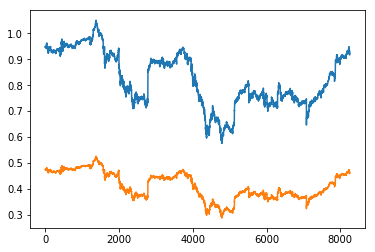

0.0013187991


In [63]:
# Make Session
net = tf.Session()# Run initializer
net.run(tf.global_variables_initializer())

# Setup interactive plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Number of epochs and batch size
epochs = 10
batch_size = 256

for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

    
            
mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)